In [16]:
import random

from data_loader import *

from sklearn.model_selection import train_test_split

from imutils import build_montages

import matplotlib.pyplot as plt

In [17]:
image_dir1 = r"D:\snn_mask\snn_training_IEEE_mask\ours(560)\s1_ieee"
image_dir2 = r"D:\snn_mask\snn_training_IEEE_mask\ours(560)\s2_ieee"

images1 = load_images(image_dir1)
images2 = load_images(image_dir2)

pairs, labels = create_labels(images1, images2)

train_pairs, test_pairs, train_labels, test_labels = train_test_split(pairs, labels, test_size=0.2, random_state=42)

0 21
1 161
2 279
3 230
4 183
5 79
6 113
7 145
8 245
9 120
10 208
11 61
12 227
13 128
14 33
15 107
16 84
17 115
18 142
19 94
20 258
21 216
22 3
23 53
24 198
25 43
26 50
27 124
28 145
29 158
30 185
31 91
32 59
33 167
34 169
35 69
36 224
37 263
38 168
39 199
40 102
41 259
42 241
43 255
44 62
45 180
46 0
47 225
48 131
49 203
50 105
51 115
52 11
53 176
54 152
55 106
56 4
57 249
58 11
59 213
60 239
61 181
62 86
63 89
64 262
65 121
66 26
67 156
68 236
69 102
70 209
71 13
72 1
73 42
74 134
75 138
76 120
77 181
78 105
79 245
80 44
81 24
82 56
83 130
84 51
85 251
86 185
87 46
88 215
89 129
90 120
91 28
92 162
93 123
94 232
95 202
96 62
97 61
98 42
99 65
100 278
101 19
102 17
103 135
104 123
105 193
106 169
107 238
108 195
109 259
110 89
111 238
112 131
113 80
114 61
115 44
116 11
117 78
118 30
119 254
120 186
121 150
122 256
123 231
124 189
125 221
126 227
127 61
128 223
129 267
130 262
131 43
132 264
133 188
134 97
135 1
136 220
137 167
138 46
139 168
140 87
141 211
142 259
143 266
144 193
145 

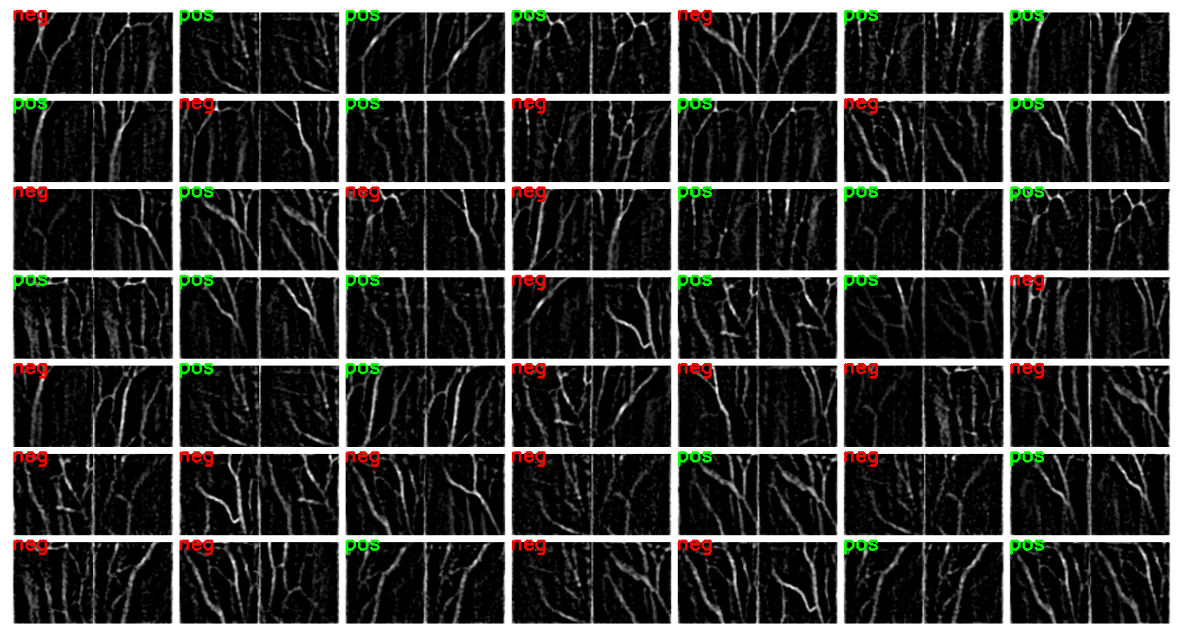

In [18]:
images = []

for i in random.sample(range(len(train_pairs)), 49):
    imageA = train_pairs[i][0]
    imageB = train_pairs[i][1]
    label = train_labels[i]

    border_size = 10
    output = np.full((256 + 2*border_size, 512 + 2*border_size), 255, dtype="uint8")
    
    output[border_size:-border_size, border_size:-border_size] = np.hstack([imageA, imageB])

    text = "neg" if label == 0 else "pos"
    color = (255, 0, 0) if label == 0 else (0, 255, 0)

    vis = cv2.merge([output] * 3)
    vis = cv2.resize(vis, (192, 102), interpolation=cv2.INTER_LINEAR)
    cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    images.append(vis)

montage = build_montages(images, (192, 102), (7, 7))[0]

plt.figure(figsize=(15, 15))
plt.imshow(montage)
plt.axis("off")
plt.show()